In [36]:
import pandas as pd

data = pd.read_csv('/content/census-income (7).csv')

In [37]:
print(data.head())
print(data.info())
print(data.describe())

   age          workclass   fnlwgt   education   education-num  \
0   39          State-gov    77516   Bachelors              13   
1   50   Self-emp-not-inc    83311   Bachelors              13   
2   38            Private   215646     HS-grad               9   
3   53            Private   234721        11th               7   
4   28            Private   338409   Bachelors              13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

    capital-gain   capital-loss   hours-per-week  native-country          
0           2174              0               40   Un

In [ ]:
print(data.isnull().sum())


In [29]:
data = pd.get_dummies(data, drop_first=True)
data.columns = data.columns.str.strip()

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_features = ['age', 'fnlwgt', 'education-num', 'hours-per-week']  # Example numerical features
data[numerical_features] = scaler.fit_transform(data[numerical_features])

In [31]:
from sklearn.model_selection import train_test_split

print([col.strip() for col in data.columns])

['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Hand

In [32]:
X = data.drop('_ >50K', axis=1)  # Assuming '_ >50K' is the target variable
y = data['_ >50K']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

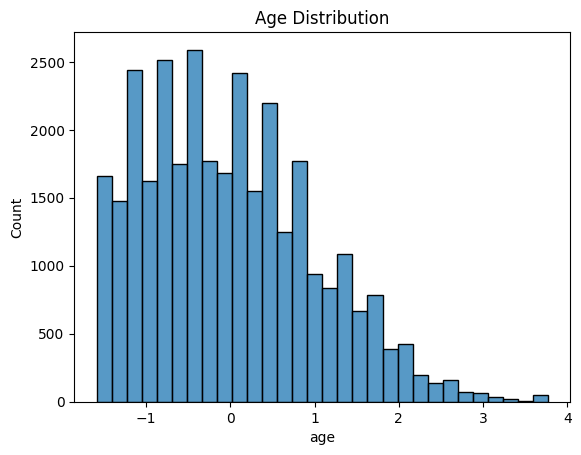

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data['age'], bins=30)
plt.title('Age Distribution')
plt.show()

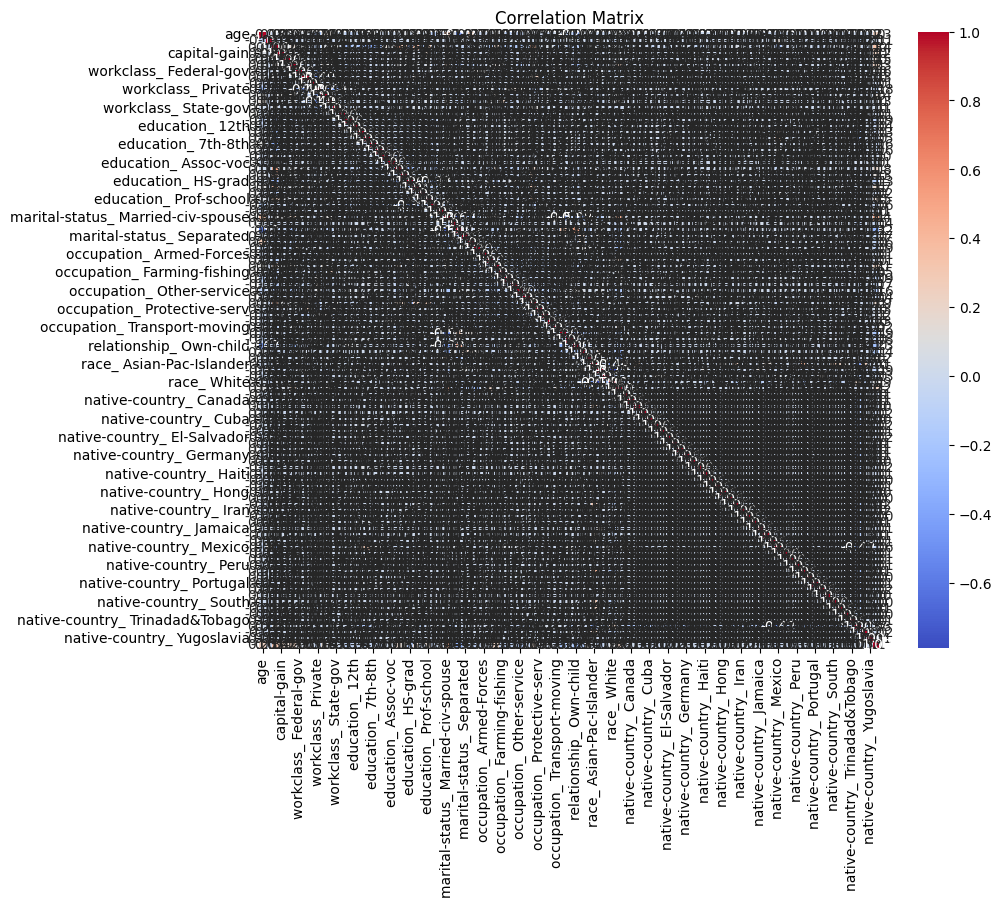

In [34]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

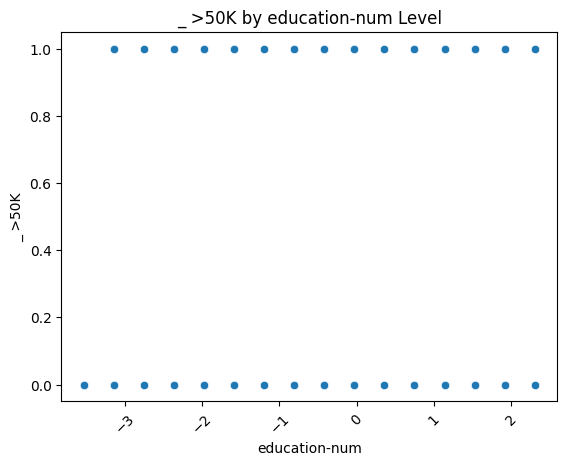

In [35]:
sns.scatterplot(x='education-num', y='_ >50K', data=data)
plt.title('_ >50K by education-num Level')
plt.xticks(rotation=45)
plt.show()

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier()

In [39]:
lr_predictions = lr_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

In [40]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_predictions))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))

print("Logistic Regression Classification Report:\n", classification_report(y_test, lr_predictions))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_predictions))

Logistic Regression Accuracy: 0.8481498541378781
Random Forest Accuracy: 0.8613542146476278
Logistic Regression Classification Report:
               precision    recall  f1-score   support

       False       0.88      0.93      0.90      4942
        True       0.73      0.59      0.65      1571

    accuracy                           0.85      6513
   macro avg       0.80      0.76      0.78      6513
weighted avg       0.84      0.85      0.84      6513

Random Forest Classification Report:
               precision    recall  f1-score   support

       False       0.89      0.93      0.91      4942
        True       0.75      0.64      0.69      1571

    accuracy                           0.86      6513
   macro avg       0.82      0.78      0.80      6513
weighted avg       0.86      0.86      0.86      6513

